# 🧑‍💼 Employee Attrition Prediction Pipeline

## HR Analytics with MLflow

### 🎯 Project Overview
This notebook builds a machine learning pipeline to predict employee attrition using the IBM HR Analytics dataset. The goal is to demonstrate how ML can support data-driven HR and retention decisions using production-ready practices.

### 🎓 Key Things Learned
Load, explore, and preprocess structured HR data
Train and evaluate classification models for attrition prediction
Machine Learning Operations to track experiments and models using MLflow

### 📊 Business Problem
Employee attrition is expensive and disruptive.
Organizations need early signals to identify employees at risk of leaving so they can take proactive retention actions (e.g., compensation review, workload adjustment, career development).
This project predicts attrition risk to support better workforce planning and retention strategies.

### 🔄 Workflow
Data loading & exploration
Data preprocessing & feature encoding
Baseline model training (Random Forest)
Model comparison (Gradient Boosting)
Experiment tracking & model registration with MLflow

### 🚀 Key Features
MLflow experiment tracking
Model comparison and versioning
Reproducible, production-ready pipeline
Business-focused interpretation of results

Let’s build a practical HR attrition prediction system. 🚀

In [2]:
pip install pandas numpy matplotlib seaborn mlflow scikit-learn hyperopt cloudpickle kaggle

  Using cached matplotlib-3.10.8-cp314-cp314-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached mlflow-3.8.1-py3-none-any.whl.metadata (31 kB)
  Using cached scikit_learn-1.8.0-cp314-cp314-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached cloudpickle-3.1.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached contourpy-1.3.3-cp314-cp314-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-macosx_10_15_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.1.0-cp314-cp314-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached mlflow_skinny-3.8.1-py3-none-any.whl.metadata (31 kB)
  Using cached mlflow_tracing-

In [6]:
# Essential Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import data
os.environ['KAGGLE_USERNAME'] = "giftasantosa"
os.environ['KAGGLE_KEY'] = "KGAT_300c880e4ac3a7871e5ca97dd17d42a1"
!kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset --unzip
attrition_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

print(f"✅ Dataset loaded successfully!")
print(f"   📏 Size: {attrition_data.shape[0]:,} employees × {attrition_data.shape[1]} features")
print(f"   🎯 Target: 'Attrition' column (Yes/No)")
print(f"   💾 Memory usage: {attrition_data.memory_usage().sum() / 1024:.1f} KB")

# Quick preview
print(f"\n📋 DATASET PREVIEW:")
display(attrition_data.head())

print(f"\n📊 ATTRITION DISTRIBUTION:")
attrition_counts = attrition_data['Attrition'].value_counts()
attrition_rate = attrition_counts['Yes'] / len(attrition_data)
print(f"   • Total employees: {len(attrition_data):,}")
print(f"   • Employees who stayed: {attrition_counts['No']:,} ({attrition_counts['No']/len(attrition_data):.1%})")
print(f"   • Employees who left: {attrition_counts['Yes']:,} ({attrition_rate:.1%})")
print(f"   • Business impact: {attrition_rate:.1%} attrition rate {'(HIGH)' if attrition_rate > 0.50 else '(MODERATE)' if attrition_rate > 0.25 else '(LOW)'}")

print(f"\n🎯 Ready to build our attrition prediction pipeline!")

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
License(s): DbCL-1.0
  0%|                                               | 0.00/50.1k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 50.1k/50.1k [00:00<00:00, 670kB/s]
✅ Dataset loaded successfully!
   📏 Size: 1,470 employees × 35 features
   🎯 Target: 'Attrition' column (Yes/No)
   💾 Memory usage: 402.1 KB

📋 DATASET PREVIEW:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



📊 ATTRITION DISTRIBUTION:
   • Total employees: 1,470
   • Employees who stayed: 1,233 (83.9%)
   • Employees who left: 237 (16.1%)
   • Business impact: 16.1% attrition rate (LOW)

🎯 Ready to build our attrition prediction pipeline!


🔧 BASIC DATA PREPROCESSING FOR ML
✅ Data ready: 1,470 employees × 42 features
🎯 Attrition rate: 16.1%


/var/folders/12/2wb75wfx52q7pwmhpbm_0_040000gn/T/ipykernel_5491/3405823399.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_encoded, x='attrition_binary', palette=['skyblue', 'salmon'])


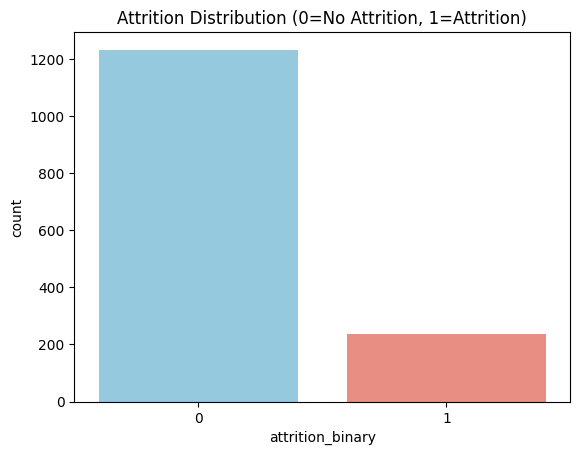

🚀 Ready for ML Pipeline!


In [10]:
# Quick Data Preprocessing - Focus on ML Pipeline
print("🔧 BASIC DATA PREPROCESSING FOR ML")
print("="*60)

# Create working copy and basic cleaning
data = attrition_data.copy()

# Create binary attrition target (like wine quality approach)
data['attrition_binary'] = (data['Attrition'] == 'Yes').astype(int)

# One-hot encode categorical variables
categorical_columns = ['BusinessTravel', 'Department', 'EducationField']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print(f"✅ Data ready: {data_encoded.shape[0]:,} employees × {data_encoded.shape[1]} features")
print(f"🎯 Attrition rate: {data_encoded['attrition_binary'].mean():.1%}")

# Quick EDA - Churn distribution visualization
sns.countplot(data=data_encoded, x='attrition_binary', palette=['skyblue', 'salmon'])
plt.title('Attrition Distribution (0=No Attrition, 1=Attrition)')
plt.show()

print(f"🚀 Ready for ML Pipeline!")